In [2]:
# Menentukan Library yang Digunakan

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Memuat Data
df = pd.read_csv('Absensi.csv')

In [4]:
# Hapus baris duplikat
df = df.drop_duplicates()

In [5]:
# Hapus baris dengan nilai yang hilang
df = df.dropna()

In [6]:
# Pilih kolom-kolom yang relevan untuk clustering
columns_for_clustering = ['Check_In', 'Check_Out']

In [7]:
# Ubah kolom waktu menjadi objek datetime
for col in columns_for_clustering:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [8]:
# Buat DataFrame baru dengan selisih waktu
df['Check_In_Out_Diff'] = (df['Check_Out'] - df['Check_In']).dt.total_seconds() / 3600

In [9]:
# Pilih fitur untuk clustering
X = df[['Check_In_Out_Diff']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Tentukan jumlah cluster optimal menggunakan Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

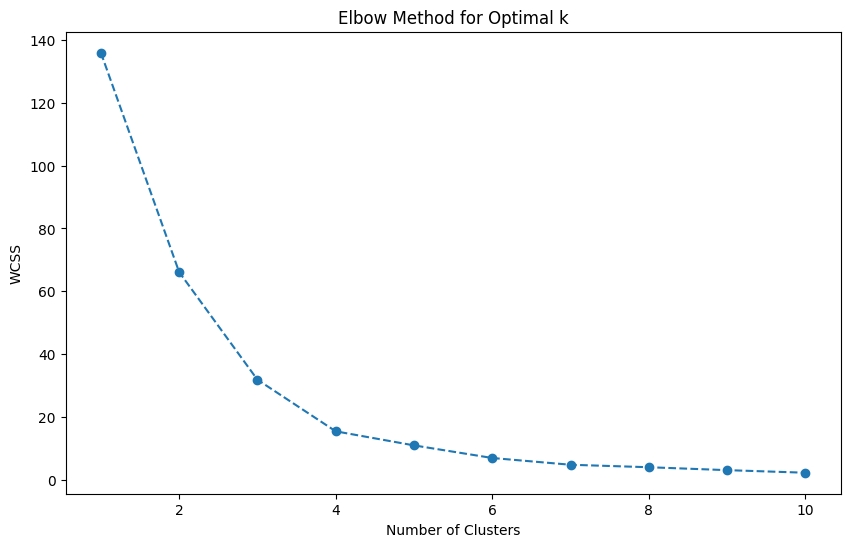

In [11]:
# Plot Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [12]:
# Berdasarkan Metode Elbow, pilih jumlah cluster (k) yang optimal
optimal_k = 3

# Terapkan clustering K-Means dengan k yang dipilih
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

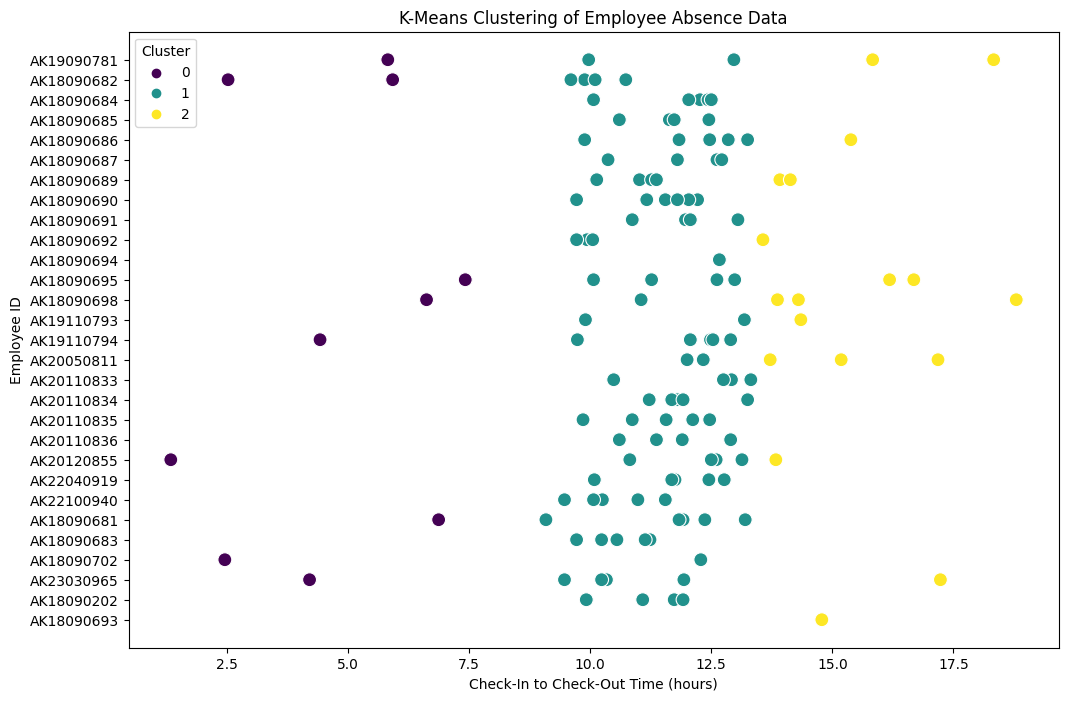

In [13]:
# Visualisasikan cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Check_In_Out_Diff', y='Employee_ID*', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of Employee Absence Data')
plt.xlabel('Check-In to Check-Out Time (hours)')
plt.ylabel('Employee ID')
plt.legend(title='Cluster')
plt.show()